## solve with CZ method

In [1]:
from NSPLIB.src.instances.crude_selection.crude_selection import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
import cProfile
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['pickCrude[2]'] = 1
binary_y_val['pickCrude[3]'] = 1
binary_y_val['pickCrude[4]'] = 1
binary_y_val['pickCrude[8]'] = 1
binary_y_val['pickCrude[10]'] = 1
m.fix_binary_y(binary_y_val)
updated_y_bound=m.y_bound
updated_y_bound['crudeQuantity[1]']=(0,0)
updated_y_bound['crudeQuantity[5]']=(0,0)
updated_y_bound['crudeQuantity[6]']=(0,0)
updated_y_bound['crudeQuantity[7]']=(0,0)
updated_y_bound['crudeQuantity[9]']=(0,0)
updated_y_bound['crudeQuantity[2]']=(149,152)
updated_y_bound['crudeQuantity[3]']=(199,203)
updated_y_bound['crudeQuantity[4]']=(54,58)
updated_y_bound['crudeQuantity[8]']=(160,164)
updated_y_bound['crudeQuantity[10]']=(16,21)
m.update_y_bound(updated_y_bound)
# m.update_y_bound({'crudeQuantity[1]': [0, 0], 'crudeQuantity[2]': [150.75121227052588, 151.000700564433], 'crudeQuantity[3]': [201.1709633227583, 201.29570747217807], 'crudeQuantity[4]': [56.05981734762004, 56.309305641527146], 'crudeQuantity[5]': [0, 0], 'crudeQuantity[6]': [0, 0], 'crudeQuantity[7]': [0, 0], 'crudeQuantity[8]': [162.12190591201795, 162.37139420592507], 'crudeQuantity[9]': [0, 0], 'crudeQuantity[10]': [18.72337265309496, 18.972860947002065]})
# alg=CaoZavalaAlgo(m,solver="baron")
# alg.solve(max_iter=1e5, max_time=3600*24, tol=1e-3,ubd_local_solve=1,ubd_midpt_fix=0,ubd_provided=-18350.146929613762)
from pyomo.environ import Constraint
def total_y_equals_100_rule(model):
    crude_sol = {}
    crude_sol['crudeQuantity[2]'] = 150.87595641747944
    crude_sol['crudeQuantity[3]'] = 201.29570746971186
    crude_sol['crudeQuantity[4]'] = 56.18456149457359
    crude_sol['crudeQuantity[8]'] = 162.2466500589715
    crude_sol['crudeQuantity[10]'] = 18.848116800048512
    return sum((model.y[i]-crude_sol[i])**2 for i in crude_sol) == 1

m.origin_model.total_y_equals_100 = Constraint(rule=total_y_equals_100_rule)
from pyomo.opt import SolverFactory
solver = SolverFactory('baron')
results=solver.solve(m.origin_model,tee=True)

 BARON version 25.3.19. Built: OSX-64 2025-03-19 22:00:43         
 Running on machine ipsec-10-2-192-162.vpn.gatech.edu

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Jingzhi Yang at Georgia Institute of Technology, jyang872@gatech.edu.

 If you publish work using this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Zhang, Y. and N. V. Sahinidis, Solving continuous and discrete
 nonlinear programs with BARON, Comput Optim Appl (2024). 
 https://doi.org/10.1007/s10589-024-00633-0
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC                                         
 For NLP: FILTERSQP
 Doing local search
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration       Time (s)     Mem   Lower bound     Upper bound   Progress
*         1           1.01    19MB    -18549.4        -18349.7       69.68%
*       

KeyboardInterrupt: 

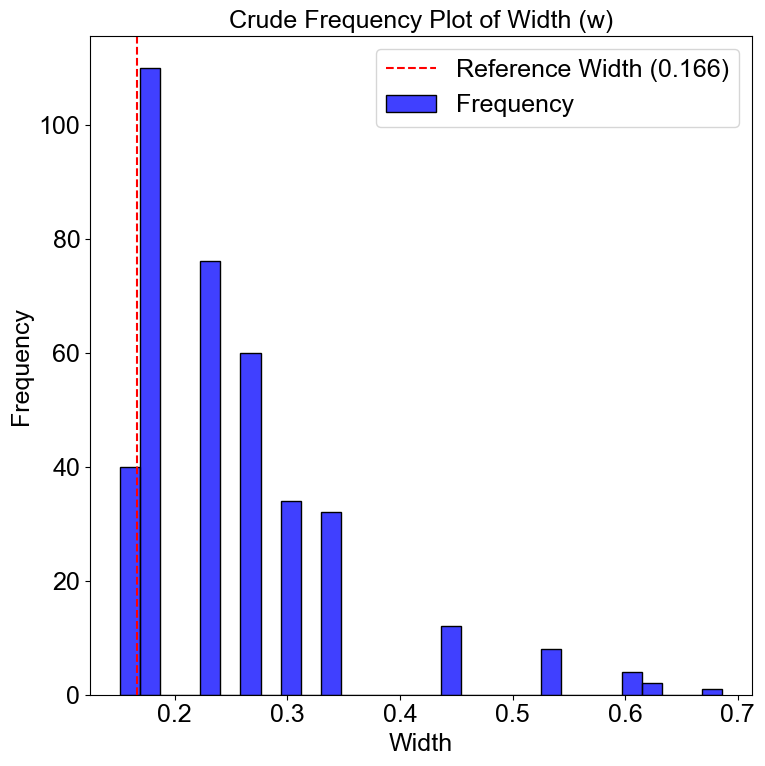

In [3]:
import seaborn as sns

sns.histplot(w, bins=30, kde=False, color='blue', label='Frequency')
plt.axvline(0.166, color='red', linestyle='dashed', linewidth=1.5, label='Reference Width (0.166)')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Crude Frequency Plot of Width (w)')
plt.legend()
plt.show()

In [3]:
from pyomo.opt import SolverFactory
solver = SolverFactory('baron')
solver.solve(m.origin_model, tee=True)
cProfile.run("alg.solve(max_iter=1e5, max_time=60*2, tol=1e-2,ubd_local_solve=1)","/Users/jyang872/Documents/decomposition/DecompConv/main.prof")

 BARON version 24.9.12. Built: OSX-64 Thu Sep 12 14:02:57 EDT 2024
 Running on machine lawn-128-61-40-254.lawn.gatech.edu

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Jingzhi Yang at University of System of Georgia, jyang872@gatech.edu.

 If you publish work using this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC                                         
 For NLP: FILTERSQP
 Doing local search
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration       Time (s)     Mem   Lower bound     Upper bound   Progress
          1           0.09    26MB   -0.108387E+07    0.100000E+52    NA
        411        

Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 120
	Tolerance: 1E-02
Initialize the model...
	Root node lower bound: -40776.68, upper bound: -36700.29
	Total initialization CPU time: 1.46 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap


KeyError: 0

## solve with LG method

In [1]:
from NSPLIB.src.instances.crude_selection.crude_selection import const_model
from src.models.lagrangean_model import LagrangeanAlgo,LagrangeanModel
sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['pickCrude[2]'] = 1
binary_y_val['pickCrude[3]'] = 1
binary_y_val['pickCrude[4]'] = 1
binary_y_val['pickCrude[8]'] = 1
binary_y_val['pickCrude[10]'] = 1
m.fix_binary_y(binary_y_val)
alg = LagrangeanAlgo(m, lag_iter= 200,solver='baron')
alg.solve(max_iter=1e5, max_time=3600*8, tol=1e3)
alg.res.plot_bb_n_gap()
alg.res.lbds

Building models...
Done.
Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 28800
	Tolerance: 1E+03
Initialize the model...


green flag 0 yellow flag 0 red flag 0
product 59654.388670253604 improve inf improve_threshold 1e-20
iter 0 stepsize 0.1 subgradient {1: {'crudeQuantity[1]': 0, 'crudeQuantity[2]': 0, 'crudeQuantity[3]': 0, 'crudeQuantity[4]': 0, 'crudeQuantity[5]': 0, 'crudeQuantity[6]': 0, 'crudeQuantity[7]': 0, 'crudeQuantity[8]': 0, 'crudeQuantity[9]': 0, 'crudeQuantity[10]': 0}, 2: {'crudeQuantity[1]': 0.0, 'crudeQuantity[2]': 74.3712983695423, 'crudeQuantity[3]': 120.0002935953913, 'crudeQuantity[4]': -186.27344992050877, 'crudeQuantity[5]': 0.0, 'crudeQuantity[6]': 0.0, 'crudeQuantity[7]': 0.0, 'crudeQuantity[8]': 29.46611217903029, 'crudeQuantity[9]': 0.0, 'crudeQuantity[10]': 17.93085449225087}, 3: {'crudeQuantity[1]': 0.0, 'crudeQuantity[2]': 10.5590522082463, 'crudeQuantity[3]': -20.584159130421142, 'crudeQuantity[4]': 0.0, 'crudeQuantity[5]': 0.0, 'crudeQuantity[6]': 0.0, 'crudeQuantity[7]': 0.0, 'crudeQuantity[8]': 3.4340838712722075, 'crudeQuantity[9]': 0.0, 'crudeQuantity[10]': 17.930854

KeyboardInterrupt: 

<Axes3D: xlabel='crudeQuantity[2]', ylabel='crudeQuantity[4]'>

/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  func(*args, **kwargs)


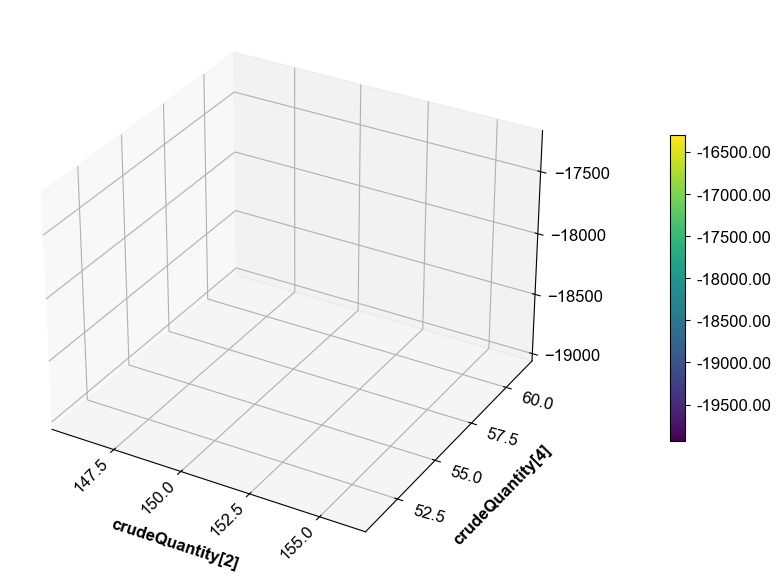

In [2]:
from src.analyses.value_function import ValueFunction

v_f = ValueFunction(m, solver='baron')
y_val = {f'pickCrude[{i}]': 0. for i in range(1, 10 + 1)}
y_val['pickCrude[10]'] = 1
y_val['pickCrude[2]'] = 1
y_val['pickCrude[3]'] = 1
y_val['pickCrude[4]'] = 1
y_val['pickCrude[8]'] = 1
y_val.update({f'crudeQuantity[{i}]': 0. for i in range(1, 10 + 1)})
y_val['crudeQuantity[2]'] = 150.87595641747944
y_val['crudeQuantity[3]'] = 201.29570746971186
y_val['crudeQuantity[4]'] = 56.18456149457359
y_val['crudeQuantity[8]'] = 162.2466500589715
y_val['crudeQuantity[10]'] = 18.848116800048512
"""
         crudeQuantity[10] :     0 : 18.848116800048512 :  210.2623211446741 : False : False : NonNegativeReals
         crudeQuantity[1] :     0 :                0.0 : 201.29570747217807 : False : False : NonNegativeReals
         crudeQuantity[2] :     0 : 150.87595641747944 : 212.48012718600953 : False : False : NonNegativeReals
         crudeQuantity[3] :     0 : 201.29570746971186 : 201.29570747217807 : False : False : NonNegativeReals
         crudeQuantity[4] :     0 :  56.18456149457359 : 199.57869634340224 : False : False : NonNegativeReals
         crudeQuantity[5] :     0 :                0.0 : 210.54848966613673 : False : False : NonNegativeReals
         crudeQuantity[6] :     0 :                0.0 :  222.1383147853736 : False : False : NonNegativeReals
         crudeQuantity[7] :     0 :                0.0 :  196.7885532591415 : False : False : NonNegativeReals
         crudeQuantity[8] :     0 :  162.2466500589715 : 208.54531001589828 : False : False : NonNegativeReals
         crudeQuantity[9] :     0 :                0.0 :  204.3720190779014 : False : False : NonNegativeReals
            pickCrude[10] :     0 :                  1 :                  1 :  True :  True :           Binary
             pickCrude[1] :     0 :                  0 :                  1 :  True :  True :           Binary
             pickCrude[2] :     0 :                  1 :                  1 :  True :  True :           Binary
             pickCrude[3] :     0 :                  1 :                  1 :  True :  True :           Binary
             pickCrude[4] :     0 :                  1 :                  1 :  True :  True :           Binary
             pickCrude[5] :     0 :                  0 :                  1 :  True :  True :           Binary
             pickCrude[6] :     0 :                  0 :                  1 :  True :  True :           Binary
             pickCrude[7] :     0 :                  0 :                  1 :  True :  True :           Binary
             pickCrude[8] :     0 :                  1 :                  1 :  True :  True :           Binary
             pickCrude[9] :     0 :                  0 :                  1 :  True :  True :           Binary
"""
idx_1 = 'crudeQuantity[2]'
idx_2 = 'crudeQuantity[4]'

val_1 = y_val[idx_1]
val_2 = y_val[idx_2]

eps = 5

interval_1 = (y_val[idx_1]-eps, y_val[idx_1]+eps)
interval_2 = (y_val[idx_2]-eps, y_val[idx_2]+eps)
v_f.calc_2D(idx_1, idx_2, y_val.copy(), interval_1=interval_1, interval_2=interval_2, step=2)
v_f.plot_2D()

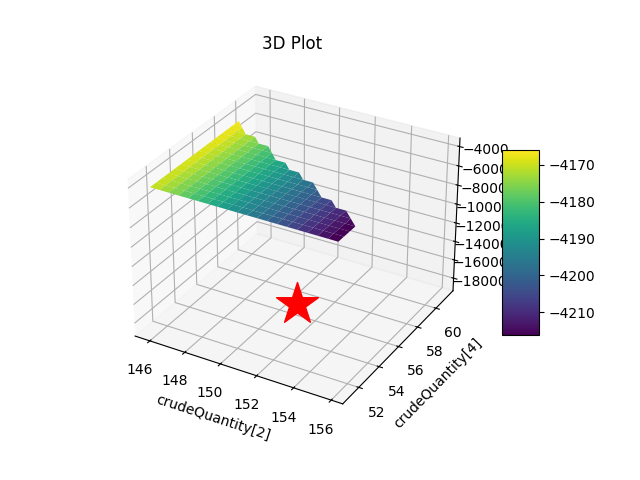

In [17]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(v_f.y_mesh[0], v_f.y_mesh[1], v_f.value_func[3], cmap='viridis')
fig.colorbar(surf,  ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel(idx_1)
ax.set_ylabel(idx_2)
ax.set_zlabel('Z')  # Replace 'Z' with the appropriate label
ax.scatter(y_val[idx_1], y_val[idx_2], -18350.1, c='red', marker='*', s=1000)
plt.title('3D Plot')
plt.show()

In [1]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
from NSPLIB.src.instances.crude_selection.crude_selection import const_model

sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()

binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['pickCrude[2]'] = 1
binary_y_val['pickCrude[3]'] = 1
binary_y_val['pickCrude[4]'] = 1
binary_y_val['pickCrude[8]'] = 1
binary_y_val['pickCrude[10]'] = 1
m.fix_binary_y(binary_y_val)

alg= CaoZavalaAlgo(m, solver='baron')
ca = HausdorffAnalyzer(alg)
y_val={f'crudeQuantity[{i}]': 0. for i in range(1, 10 + 1)}
y_val['crudeQuantity[2]'] = 150.87595641747944
y_val['crudeQuantity[3]'] = 201.29570746971186
y_val['crudeQuantity[4]'] = 56.18456149457359
y_val['crudeQuantity[8]'] = 162.2466500589715
y_val['crudeQuantity[10]'] = 18.848116800048512
v_val=-18350.1
eps_min = -4
eps_max = 0
steps = 5

tol = 1e-9

eps_list, distances = ca.analyze(y=y_val,y_optimal=True, v=v_val, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)

Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 9.71E+01
	diameter = 1.0E-01, distance = 1.11E+01
	diameter = 1.0E-02, distance = 1.16E+00
	diameter = 1.0E-03, distance = 1.58E-01
	diameter = 1.0E-04, distance = 5.80E-02
Done!


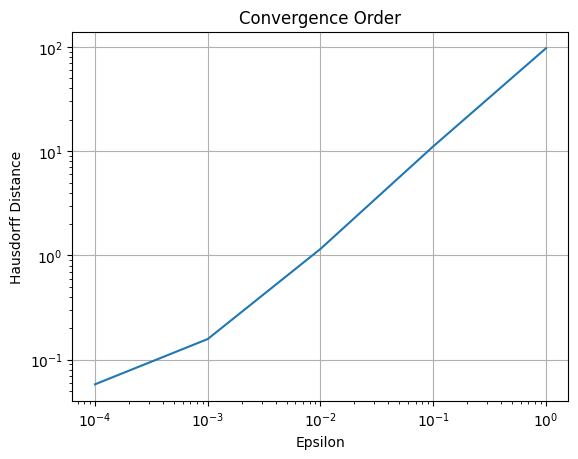

In [2]:
import matplotlib.pyplot as plt
plt.plot(eps_list, distances)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Hausdorff Distance')
plt.title('Convergence Order')
plt.grid(True)
plt.show()